## AI_Assignment_01

1. Implement A* search on a maze (given as a 2D matrix where 1=wall, 0=path, A=start,
B=goal).
- Use Manhattan distance as heuristic.
- Visualize the path found.

2. Modify the heuristic:
- Case 1: Multiply Manhattan distance by 1.5 (check if it is admissible).
- Case 2: Define heuristic so that for one edge it violates consistency.
3. For each case, run A* and record:
- Path found
- Cost of path
- Whether the path is optimal 

In [23]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

# --------------------------
# Utility functions
# --------------------------
def find_start_goal(maze):
    start = goal = None
    for r in range(len(maze)):
        for c in range(len(maze[0])):
            if maze[r][c] == 'A':
                start = (r, c)
            elif maze[r][c] == 'B':
                goal = (r, c)
    return start, goal

def manhattan(p1, p2):
    return abs(p1[0]-p2[0]) + abs(p1[1]-p2[1])

def scaled_manhattan(p1, p2, scale=2):
    return scale * manhattan(p1, p2)

def inconsistent_heuristic(p1, p2):
    if p1 in [(1,2), (2,3)]:
        return 10 + manhattan(p1, p2)
    return manhattan(p1, p2)


# --------------------------
# A* Search Algorithm
# --------------------------
def astar(maze, heuristic_func):
    start, goal = find_start_goal(maze)
    if not start or not goal:
        raise ValueError("Maze must have 'A' as start and 'B' as goal")
    
    open_set = []
    heapq.heappush(open_set, (0 + heuristic_func(start, goal), 0, start, [start]))
    visited = set()
    
    while open_set:
        f, g, current, path = heapq.heappop(open_set)
        if current in visited:
            continue
        visited.add(current)
        
        if current == goal:
            return path, g
        
        r, c = current
        for dr, dc in [(-1,0),(1,0),(0,-1),(0,1)]:
            nr, nc = r + dr, c + dc
            if 0 <= nr < len(maze) and 0 <= nc < len(maze[0]):
                if maze[nr][nc] != 1 and (nr,nc) not in visited:
                    new_g = g + 1
                    heapq.heappush(open_set, (new_g + heuristic_func((nr,nc), goal), new_g, (nr,nc), path + [(nr,nc)]))
    return None, float('inf')

# --------------------------
# Visualization - overlay all paths
# --------------------------
def visualize_all_paths(maze, results):
    maze_copy = np.zeros((len(maze), len(maze[0])))
    for r in range(len(maze)):
        for c in range(len(maze[0])):
            if maze[r][c] == 1:
                maze_copy[r][c] = 1  # walls as 1
            elif maze[r][c] =='A' or maze[r][c] == 'B':
                maze_copy[r][c] = 0  # start/goal as open
    
    plt.figure(figsize=(10,8))
    plt.imshow(maze_copy, cmap='gray_r')  # walls dark, paths light
    
    colors = {
        "Standard Manhattan": 'red',
        "Scaled Manhattan ×1.5": 'blue',
        "Inconsistent Heuristic": 'green'
    }
    
    for name, res in results.items():
        path = res['path']
        if path is None:
            continue
        ys = [p[0] for p in path]
        xs = [p[1] for p in path]
        plt.plot(xs, ys, label=f"{name} (cost={res['cost']})", linewidth=3, color=colors[name])
        plt.scatter(xs[0], ys[0], marker='o', color=colors[name], s=100)  # start point
        plt.scatter(xs[-1], ys[-1], marker='X', color=colors[name], s=100)  # end point
    
    plt.legend()
    plt.gca().invert_yaxis()  # match array indexing
    plt.title("Paths found by different heuristics")
    plt.show()

# --------------------------
# Run all heuristics and visualize
# --------------------------
def run_all_heuristics(maze):
    heuristics = {
        "Standard Manhattan": manhattan,
        "Scaled Manhattan ×1.5": lambda p1,p2: scaled_manhattan(p1,p2,2),
        "Inconsistent Heuristic": inconsistent_heuristic
    }
    
    results = {}
    for name, h_func in heuristics.items():
        path, cost = astar(maze, h_func)
        results[name] = {"path": path, "cost": cost}
        print(f"=== {name} ===")
        print("Cost:", cost)
    visualize_all_paths(maze, results)
    return results

# Example maze from your code



=== Standard Manhattan ===
Cost: 20
=== Scaled Manhattan ×1.5 ===
Cost: 20
=== Inconsistent Heuristic ===
Cost: 20


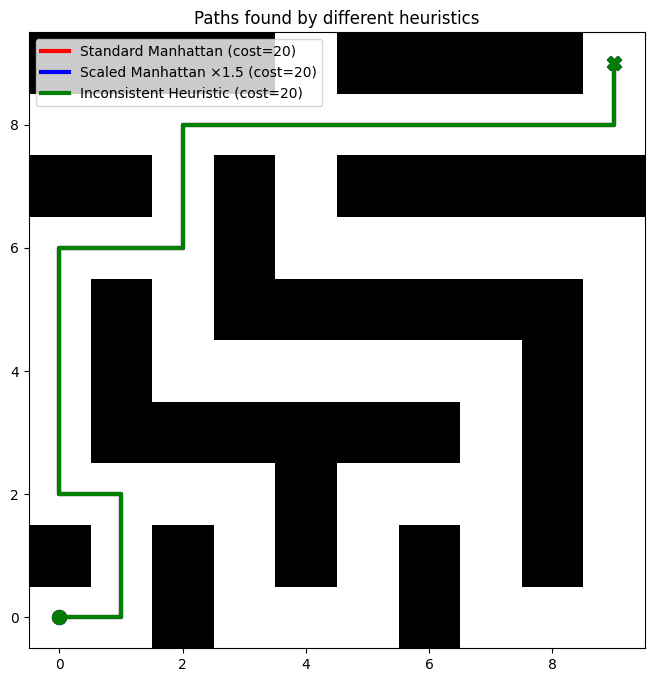

{'Standard Manhattan': {'path': [(0, 0),
   (0, 1),
   (1, 1),
   (2, 1),
   (2, 0),
   (3, 0),
   (4, 0),
   (5, 0),
   (6, 0),
   (6, 1),
   (6, 2),
   (7, 2),
   (8, 2),
   (8, 3),
   (8, 4),
   (8, 5),
   (8, 6),
   (8, 7),
   (8, 8),
   (8, 9),
   (9, 9)],
  'cost': 20},
 'Scaled Manhattan ×1.5': {'path': [(0, 0),
   (0, 1),
   (1, 1),
   (2, 1),
   (2, 0),
   (3, 0),
   (4, 0),
   (5, 0),
   (6, 0),
   (6, 1),
   (6, 2),
   (7, 2),
   (8, 2),
   (8, 3),
   (8, 4),
   (8, 5),
   (8, 6),
   (8, 7),
   (8, 8),
   (8, 9),
   (9, 9)],
  'cost': 20},
 'Inconsistent Heuristic': {'path': [(0, 0),
   (0, 1),
   (1, 1),
   (2, 1),
   (2, 0),
   (3, 0),
   (4, 0),
   (5, 0),
   (6, 0),
   (6, 1),
   (6, 2),
   (7, 2),
   (8, 2),
   (8, 3),
   (8, 4),
   (8, 5),
   (8, 6),
   (8, 7),
   (8, 8),
   (8, 9),
   (9, 9)],
  'cost': 20}}

In [24]:
maze = [
    ['A',0,1,0,0,0,1,0,0,0],
    [1,0,1,0,1,0,1,0,1,0],
    [0,0,0,0,1,0,0,0,1,0],
    [0,1,1,1,1,1,1,0,1,0],
    [0,1,0,0,0,0,0,0,1,0],
    [0,1,0,1,1,1,1,1,1,0],
    [0,0,0,1,0,0,0,0,0,0],
    [1,1,0,1,0,1,1,1,1,1],
    [0,0,0,0,0,0,0,0,0,0],
    [1,1,1,1,0,1,1,1,1,'B'],
]

run_all_heuristics(maze)

=== Standard Manhattan ===
Cost: 15
=== Scaled Manhattan ×1.5 ===
Cost: 17
=== Inconsistent Heuristic ===
Cost: 15


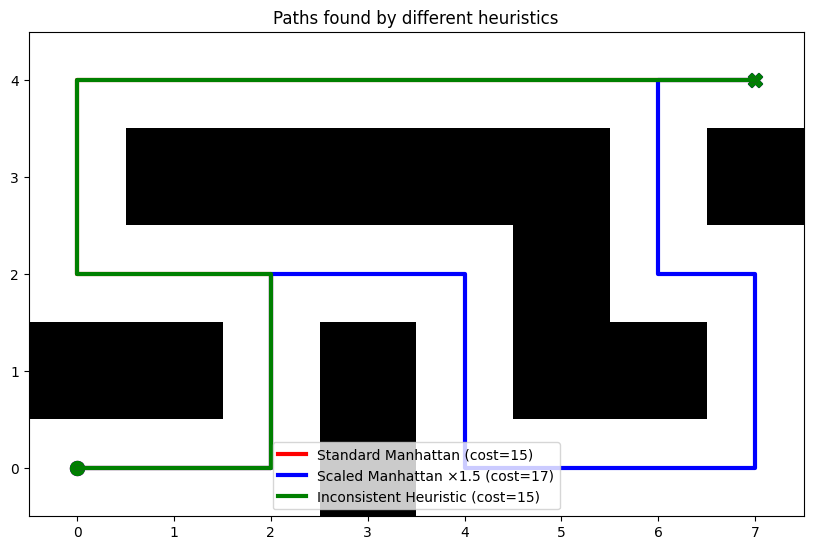

{'Standard Manhattan': {'path': [(0, 0),
   (0, 1),
   (0, 2),
   (1, 2),
   (2, 2),
   (2, 1),
   (2, 0),
   (3, 0),
   (4, 0),
   (4, 1),
   (4, 2),
   (4, 3),
   (4, 4),
   (4, 5),
   (4, 6),
   (4, 7)],
  'cost': 15},
 'Scaled Manhattan ×1.5': {'path': [(0, 0),
   (0, 1),
   (0, 2),
   (1, 2),
   (2, 2),
   (2, 3),
   (2, 4),
   (1, 4),
   (0, 4),
   (0, 5),
   (0, 6),
   (0, 7),
   (1, 7),
   (2, 7),
   (2, 6),
   (3, 6),
   (4, 6),
   (4, 7)],
  'cost': 17},
 'Inconsistent Heuristic': {'path': [(0, 0),
   (0, 1),
   (0, 2),
   (1, 2),
   (2, 2),
   (2, 1),
   (2, 0),
   (3, 0),
   (4, 0),
   (4, 1),
   (4, 2),
   (4, 3),
   (4, 4),
   (4, 5),
   (4, 6),
   (4, 7)],
  'cost': 15}}

In [25]:
maze = [
    ['A', 0, 0, 1, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 'B']
]
run_all_heuristics(maze)

=== Standard Manhattan ===
Cost: 13
=== Scaled Manhattan ×1.5 ===
Cost: 13
=== Inconsistent Heuristic ===
Cost: 13


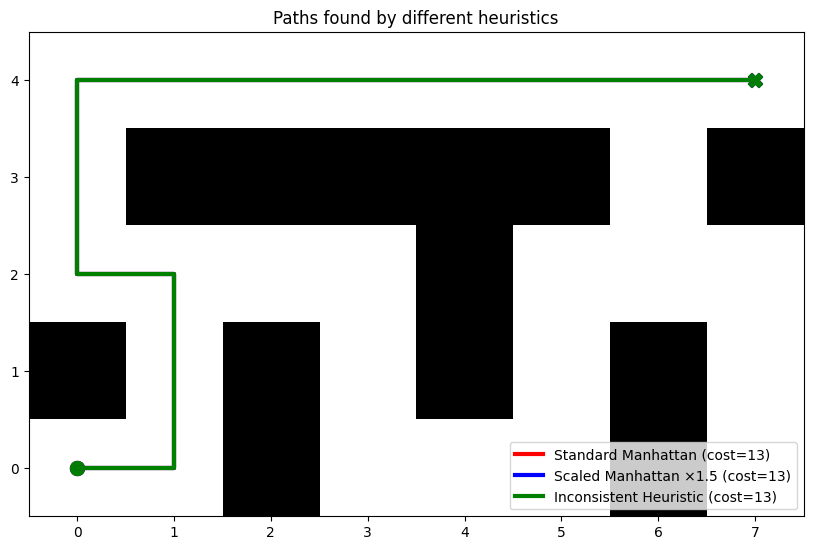

{'Standard Manhattan': {'path': [(0, 0),
   (0, 1),
   (1, 1),
   (2, 1),
   (2, 0),
   (3, 0),
   (4, 0),
   (4, 1),
   (4, 2),
   (4, 3),
   (4, 4),
   (4, 5),
   (4, 6),
   (4, 7)],
  'cost': 13},
 'Scaled Manhattan ×1.5': {'path': [(0, 0),
   (0, 1),
   (1, 1),
   (2, 1),
   (2, 0),
   (3, 0),
   (4, 0),
   (4, 1),
   (4, 2),
   (4, 3),
   (4, 4),
   (4, 5),
   (4, 6),
   (4, 7)],
  'cost': 13},
 'Inconsistent Heuristic': {'path': [(0, 0),
   (0, 1),
   (1, 1),
   (2, 1),
   (2, 0),
   (3, 0),
   (4, 0),
   (4, 1),
   (4, 2),
   (4, 3),
   (4, 4),
   (4, 5),
   (4, 6),
   (4, 7)],
  'cost': 13}}

In [26]:
maze1 = [
    ['A', 0, 1, 0, 0, 0, 1, 0],
    [1,   0, 1, 0, 1, 0, 1, 0],
    [0,   0, 0, 0, 1, 0, 0, 0],
    [0,   1, 1, 1, 1, 1, 0, 1],
    [0,   0, 0, 0, 0, 0, 0, 'B']
]
run_all_heuristics(maze1)

=== Standard Manhattan ===
Cost: 17
=== Scaled Manhattan ×1.5 ===
Cost: 17
=== Inconsistent Heuristic ===
Cost: 17


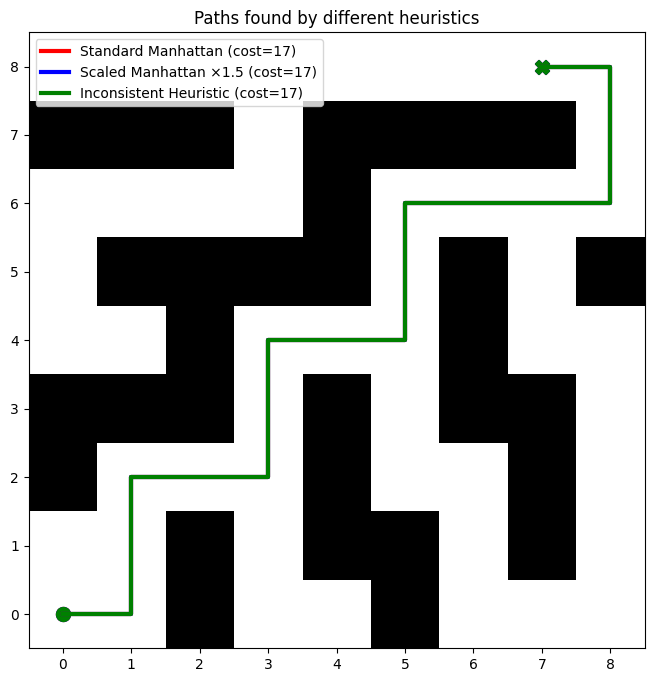

{'Standard Manhattan': {'path': [(0, 0),
   (0, 1),
   (1, 1),
   (2, 1),
   (2, 2),
   (2, 3),
   (3, 3),
   (4, 3),
   (4, 4),
   (4, 5),
   (5, 5),
   (6, 5),
   (6, 6),
   (6, 7),
   (6, 8),
   (7, 8),
   (8, 8),
   (8, 7)],
  'cost': 17},
 'Scaled Manhattan ×1.5': {'path': [(0, 0),
   (0, 1),
   (1, 1),
   (2, 1),
   (2, 2),
   (2, 3),
   (3, 3),
   (4, 3),
   (4, 4),
   (4, 5),
   (5, 5),
   (6, 5),
   (6, 6),
   (6, 7),
   (6, 8),
   (7, 8),
   (8, 8),
   (8, 7)],
  'cost': 17},
 'Inconsistent Heuristic': {'path': [(0, 0),
   (0, 1),
   (1, 1),
   (2, 1),
   (2, 2),
   (2, 3),
   (3, 3),
   (4, 3),
   (4, 4),
   (4, 5),
   (5, 5),
   (6, 5),
   (6, 6),
   (6, 7),
   (6, 8),
   (7, 8),
   (8, 8),
   (8, 7)],
  'cost': 17}}

In [27]:
maze2 = [
    ['A', 0, 1, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 1, 1, 0, 1, 0],
    [1, 0, 0, 0, 1, 0, 0, 1, 0],
    [1, 1, 1, 0, 1, 0, 1, 1, 0],
    [0, 0, 1, 0, 0, 0, 1, 0, 0],
    [0, 1, 1, 1, 1, 0, 1, 0, 1],
    [0, 0, 0, 0, 1, 0, 0, 0, 0],
    [1, 1, 1, 0, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 'B', 0]
]
run_all_heuristics(maze2)

=== Standard Manhattan ===
Cost: 17
=== Scaled Manhattan ×1.5 ===
Cost: 17
=== Inconsistent Heuristic ===
Cost: 19


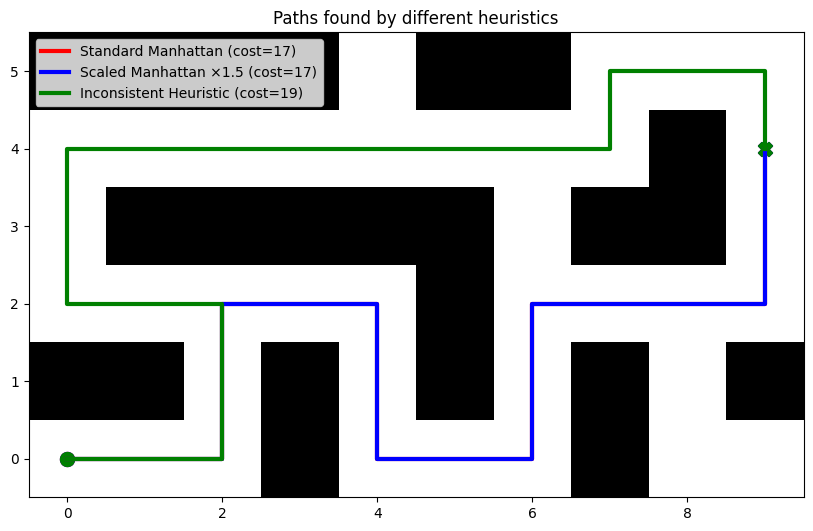

{'Standard Manhattan': {'path': [(0, 0),
   (0, 1),
   (0, 2),
   (1, 2),
   (2, 2),
   (2, 3),
   (2, 4),
   (1, 4),
   (0, 4),
   (0, 5),
   (0, 6),
   (1, 6),
   (2, 6),
   (2, 7),
   (2, 8),
   (2, 9),
   (3, 9),
   (4, 9)],
  'cost': 17},
 'Scaled Manhattan ×1.5': {'path': [(0, 0),
   (0, 1),
   (0, 2),
   (1, 2),
   (2, 2),
   (2, 3),
   (2, 4),
   (1, 4),
   (0, 4),
   (0, 5),
   (0, 6),
   (1, 6),
   (2, 6),
   (2, 7),
   (2, 8),
   (2, 9),
   (3, 9),
   (4, 9)],
  'cost': 17},
 'Inconsistent Heuristic': {'path': [(0, 0),
   (0, 1),
   (0, 2),
   (1, 2),
   (2, 2),
   (2, 1),
   (2, 0),
   (3, 0),
   (4, 0),
   (4, 1),
   (4, 2),
   (4, 3),
   (4, 4),
   (4, 5),
   (4, 6),
   (4, 7),
   (5, 7),
   (5, 8),
   (5, 9),
   (4, 9)],
  'cost': 19}}

In [28]:
maze3 = [
    ['A', 0, 0, 1, 0, 0, 0, 1, 0, 0],
    [1, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 'B'],
    [1, 1, 1, 1, 0, 1, 1, 0, 0, 0]
]
run_all_heuristics(maze3)